In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

In [8]:
def info_graph(*file):
    
    colorNum = 0
    for i in file:
        colorNum += 1
        # DATA 
        data = pd.read_csv(i)
    
        # FORMATTING THE DATE
        value = 0
        try:
            datetime.strptime(data['Date'][0], '%Y-%m-%d')
            value = 0
        except ValueError:
            value = 1
        if value == 1:
            data['Date'] = pd.to_datetime(data.Date,format='%d-%m-%Y')
        else:
            data['Date'] = pd.to_datetime(data.Date,format='%Y-%m-%d')
        data.index = data['Date']
    
        # SORTING THE DATA
        data_sort = data.sort_index(ascending=True, axis=0)
        new_data = pd.DataFrame(index=range(0,len(data)),columns=['Date', 'Close'])
    
        # NEW DATASET WITH ONLY THE TWO COLUMNS NECESSARY
        for i in range(0,len(data_sort)):
            new_data['Date'][i] = data_sort['Date'][i]
            new_data['Close'][i] = data_sort['Close'][i]
    
        new_data['Date'] = new_data['Date'].apply(pd.Timestamp.timestamp)
        new_data['Close'] = new_data['Close']
    
        # DIVIDING TEST AND TRAIN CASES
        number = int(0.8*len(new_data['Close']))
        train = new_data[:number]
        test = new_data[number:]
    
        pd.options.mode.chained_assignment = None
        
        # PREDICTIONS
        preds = []
        test_shape = data.shape[0]-number
        for i in range(0,test_shape):
            a = train['Close'][(len(train) - test_shape + i) :].sum() + sum(preds)
            b = a/(test_shape)
            preds.append(b)

        # PREDICTIONS GRAPH
        test['Predictions'] = 0
        test['Predictions'] = preds
    
        # PLOTTING THE GRAPH
        new_data['Close'].plot(label = f'COMPANY {colorNum}: DATA')
        test['Predictions'].plot(label = f'COMPANY {colorNum}: PREDICTION')

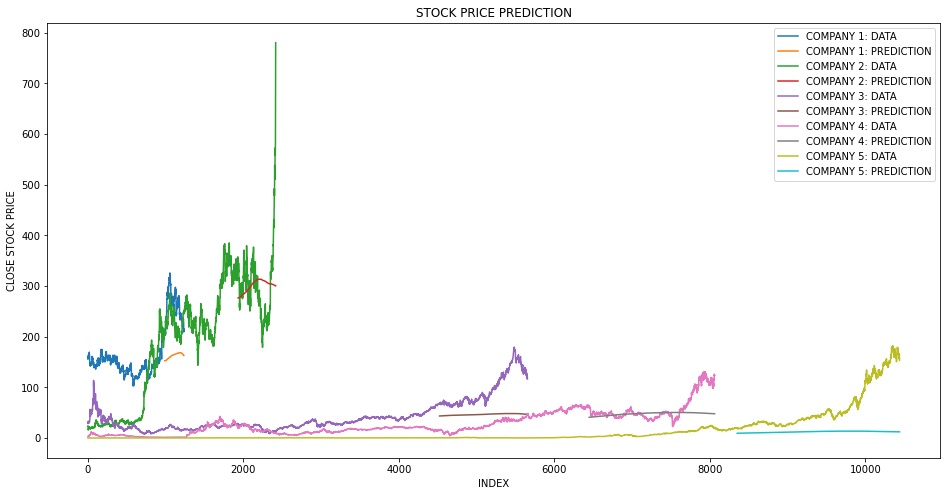

In [9]:
plt.figure(figsize=(16,8))
info_graph('NSE-TATAGLOBAL11.csv','TSLA.csv','A.csv', 'AN.csv', 'AAPL.csv')
plt.title('STOCK PRICE PREDICTION')
plt.xlabel('INDEX')
plt.ylabel('CLOSE STOCK PRICE')
plt.legend()